In [1]:
import pandas as pd
import numpy as np
import warnings # отключим предупреждения Anaconda
warnings.simplefilter('ignore')
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg' #графики в svg выглядят более четкими
from pylab import rcParams #увеличим дефолтный размер графиков
plt.style.use('ggplot')  # Красивые графики
plt.rcParams['figure.figsize'] = (15, 5)  # Размер картинок
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import plotly.graph_objects as go

init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.1f}'.format # Отображение чисел float с запятыми и 1 знаком после точки

In [2]:
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
happiness2016 = pd.read_csv("World_Happiness_2016.csv")
happiness2017 = pd.read_csv("World_Happiness_2017.csv")

happiness2015['Year'] = 2015
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

In [3]:
happiness2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
0,Norway,1,7.5,7.6,7.5,1.6,1.5,0.8,0.6,0.4,0.3,2.3,2017
1,Denmark,2,7.5,7.6,7.5,1.5,1.6,0.8,0.6,0.4,0.4,2.3,2017
2,Iceland,3,7.5,7.6,7.4,1.5,1.6,0.8,0.6,0.5,0.2,2.3,2017
3,Switzerland,4,7.5,7.6,7.4,1.6,1.5,0.9,0.6,0.3,0.4,2.3,2017
4,Finland,5,7.5,7.5,7.4,1.4,1.5,0.8,0.6,0.2,0.4,2.4,2017


In [4]:
mean_happiness = {}
regions = happiness2015['Region'].unique()
for r in regions:
    region_group = happiness2015[happiness2015['Region'] == r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean

In [5]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

In [6]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

In [7]:
def dif(group):
    return (group.max() - group.mean())
happy_mean_max = happy_grouped.agg([np.mean, np.max])
mean_max_dif = happy_grouped.agg(dif)

In [8]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand         7.3
Central and Eastern Europe        5.3
Eastern Asia                      5.6
Latin America and Caribbean       6.1
Middle East and Northern Africa   5.4
North America                     7.3
Southeastern Asia                 5.3
Southern Asia                     4.6
Sub-Saharan Africa                4.2
Western Europe                    6.7
Name: Happiness Score, dtype: float64


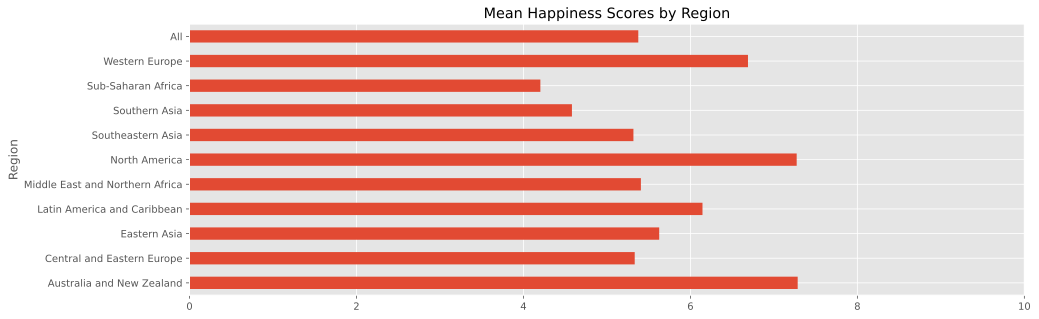

In [9]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean Happiness Scores by Region', legend=False)
world_mean_happiness = happiness2015['Happiness Score'].mean()

In [10]:
grouped = happiness2015.groupby('Region')[['Happiness Score','Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = happiness2015.pivot_table(
    ['Happiness Score', 'Family'], 'Region', aggfunc=[np.min, np.max, np.mean], margins=True
)

In [11]:
head_2015 = happiness2015[['Country','Happiness Score', 'Year']].head(3)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016])
concat_axis1 = pd.concat([head_2015, head_2016], axis=1)
question1 = 6
question2 = 3

In [12]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_axis0 = pd.concat([head_2015, head_2016])
rows = 7
columns = 4

In [13]:
head_2015 = happiness2015[['Year','Country','Happiness Score', 'Standard Error']].head(4)
head_2016 = happiness2016[['Country','Happiness Score', 'Year']].head(3)
concat_update_index = pd.concat([head_2015, head_2016], ignore_index=True)

In [14]:
three_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:5]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merged = pd.merge(left=three_2015, right=three_2016, how='left', on='Country')
merged_updated = pd.merge(left=three_2016, right=three_2015, how = 'left', on='Country')
merged_suffixes = pd.merge(left=three_2015, right=three_2016, how='left', on='Country', suffixes=('_2015', '_2016'))
merged_updated_suffixes = pd.merge(left=three_2016, right=three_2015, how='left', on='Country', suffixes=('_2016', '_2015'))

In [15]:
four_2015 = happiness2015[['Country','Happiness Rank','Year']].iloc[2:6]
three_2016 = happiness2016[['Country','Happiness Rank','Year']].iloc[2:5]
merge_index = pd.merge(left = four_2015,right = three_2016, left_index = True, right_index = True, suffixes = ('_2015','_2016'))
rows = 4
columns = 6
merge_index_left = pd.merge(
    left=four_2015, 
    right=three_2016, 
    how='left', 
    left_index=True, 
    right_index=True, 
    suffixes=('_2015','_2016')
)

<AxesSubplot:title={'center':'Mean Happiness Scores by Year'}, ylabel='Year'>

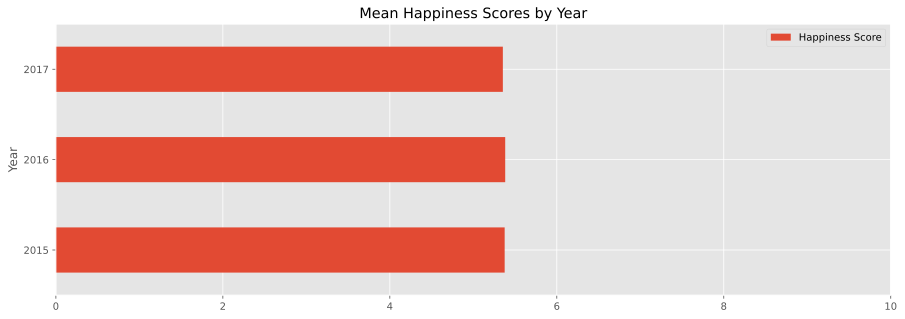

In [16]:
happiness2017.rename(columns={'Happiness.Score': 'Happiness Score'}, inplace=True)
combined = pd.concat([happiness2015, happiness2016, happiness2017])
pivot_table_combined = combined.pivot_table(index='Year', values='Happiness Score', aggfunc=np.mean)
pivot_table_combined.plot(kind='barh', title='Mean Happiness Scores by Year', xlim=(0,10))

In [17]:
mapping = {
    'Economy (GDP per Capita)': 'Economy', 
    'Health (Life Expectancy)': 'Health', 
    'Trust (Government Corruption)': 'Trust' 
}
happiness2015 = happiness2015.rename(mapping, axis = 1)

In [18]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)
equal = economy_impact_map.equals(economy_impact_apply)

In [19]:
economy_impact_apply = happiness2015['Economy'].apply(label)
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label, x = .8)

In [20]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']
factors_impact = happiness2015[factors].applymap(label)

In [21]:
def v_counts(col):
    num = col.value_counts()
    den = col.size
    return num/den
v_counts_pct = factors_impact.apply(v_counts)

In [22]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
def percentages(col):
    div = col/happiness2015['Happiness Score'] 
    return div * 100
factor_percentages = happiness2015[factors].apply(percentages)

In [23]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
melt = pd.melt(happiness2015, id_vars = main_cols, value_vars = factors)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)

<AxesSubplot:ylabel='value'>

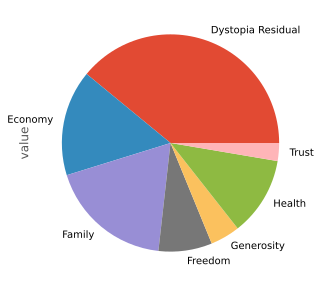

In [24]:
melt = pd.melt(
    happiness2015, id_vars = ['Country', 'Region', 'Happiness Rank', 'Happiness Score'], 
    value_vars= ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']
)
melt['Percentage'] = round(melt['value']/melt['Happiness Score'] * 100, 2)
pv_melt = melt.pivot_table(index='variable', values='value')
pv_melt.plot(kind='pie', y='value', legend=False)

In [25]:
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}
merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)

In [26]:
def extract_last_word(element):
    return str(element).split()[-1]
merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)

In [27]:
merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
print(merged['Currency Vectorized'].head())

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object


In [28]:
lengths = merged['CurrencyUnit'].str.len()
value_counts = lengths.value_counts(dropna=False)

In [29]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(pattern)
print(national_accounts.head())

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object


In [30]:
pattern = r"[Nn]ational accounts"
national_accounts = merged['SpecialNotes'].str.contains(r"[Nn]ational accounts", na=False)
merged_national_accounts = merged[national_accounts]
print(merged_national_accounts.head())

          Country                   Region_x  Happiness Rank  Happiness Score  \
4          Canada              North America               5              7.4   
7          Sweden             Western Europe               8              7.4   
8     New Zealand  Australia and New Zealand               9              7.3   
9       Australia  Australia and New Zealand              10              7.3   
14  United States              North America              15              7.1   

    Standard Error  Economy  Family  Health  Freedom  Trust  ...  \
4              0.0      1.3     1.3     0.9      0.6    0.3  ...   
7              0.0      1.3     1.3     0.9      0.7    0.4  ...   
8              0.0      1.3     1.3     0.9      0.6    0.4  ...   
9              0.0      1.3     1.3     0.9      0.7    0.4  ...   
14             0.0      1.4     1.2     0.9      0.5    0.2  ...   

    LatestPopulationCensus  LatestHouseholdSurvey  \
4                     2011                    NaN  

In [31]:
pattern =r"()"
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern, expand=True)

In [32]:
pattern = r"(?P<Years>[1-2][0-9]{3})"
years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
print(value_counts)

2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2002     1
2003     1
1995     1
2006     1
2000     1
1999     1
1992     1
1998     1
Name: Years, dtype: int64


In [33]:
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)
first_two_year = years['First_Year'].str[0:2]
years['Second_Year'] = first_two_year + years['Second_Year']

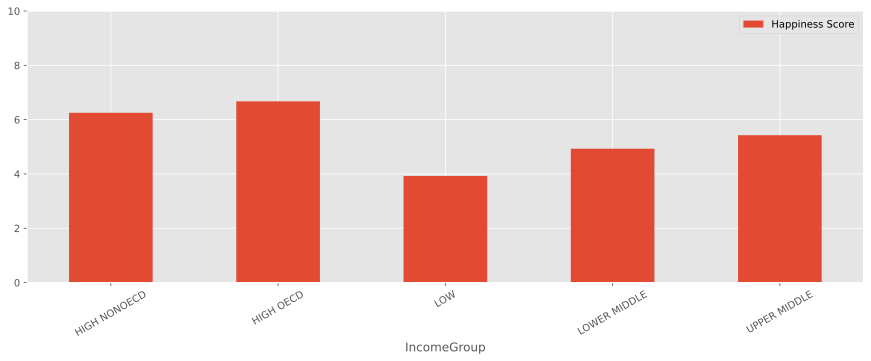

In [34]:
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()
pv_incomes = merged.pivot_table(values='Happiness Score', index='IncomeGroup')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
plt.show()

In [35]:
happiness_mean = combined['Happiness Score'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['Happiness Score'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

5.370727659882893
5.370727659882893


In [36]:
combined = combined.dropna()
missing = combined.isnull().sum()

In [37]:
shape_2015 = happiness2015.shape
shape_2016 = happiness2016.shape
shape_2017 = happiness2017.shape

In [38]:
missing_2016 = happiness2016.isnull().sum()
missing_2017 = happiness2017.isnull().sum()

In [39]:
happiness2017.columns = happiness2017.columns.str.replace('.', ' ').str.replace('\s+', ' ').str.strip().str.upper()
happiness2015.columns = happiness2015.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()
happiness2016.columns = happiness2016.columns.str.replace('(', '').str.replace(')', '').str.strip().str.upper()

combined = pd.concat([happiness2015, happiness2016, happiness2017], ignore_index=True)
missing = combined.isnull().sum()

In [40]:
regions_2017 = combined[combined['YEAR']==2017]['REGION']
missing = regions_2017.isnull().sum()

In [43]:
combined.head()

,COUNTRY,REGION,HAPPINESS RANK,HAPPINESS SCORE,STANDARD ERROR,ECONOMY,FAMILY,HEALTH,FREEDOM,TRUST,GENEROSITY,DYSTOPIA RESIDUAL,YEAR,LOWER CONFIDENCE INTERVAL,UPPER CONFIDENCE INTERVAL,ECONOMY GDP PER CAPITA,HEALTH LIFE EXPECTANCY,TRUST GOVERNMENT CORRUPTION,WHISKER HIGH,WHISKER LOW
0,Switzerland,Western Europe,1,7.6,0.0,1.4,1.3,0.9,0.7,0.4,0.3,2.5,2015,nan,nan,nan,nan,nan,nan,nan
1,Iceland,Western Europe,2,7.6,0.0,1.3,1.4,0.9,0.6,0.1,0.4,2.7,2015,nan,nan,nan,nan,nan,nan,nan
2,Denmark,Western Europe,3,7.5,0.0,1.3,1.4,0.9,0.6,0.5,0.3,2.5,2015,nan,nan,nan,nan,nan,nan,nan
3,Norway,Western Europe,4,7.5,0.0,1.5,1.3,0.9,0.7,0.4,0.3,2.5,2015,nan,nan,nan,nan,nan,nan,nan
4,Canada,North America,5,7.4,0.0,1.3,1.3,0.9,0.6,0.3,0.5,2.5,2015,nan,nan,nan,nan,nan,nan,nan


In [41]:
combined = pd.merge(left=combined, right=regions, on='COUNTRY', how='left')
combined = combined.drop('REGION_x', axis = 1)
missing = combined.isnull().sum()

TypeError: Can only merge Series or DataFrame objects, a <class 'numpy.ndarray'> was passed

In [ ]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
dups = combined.duplicated(['COUNTRY', 'YEAR'])
print(combined[dups])

In [ ]:
combined['COUNTRY'] = combined['COUNTRY'].str.upper()
combined = combined.drop_duplicates(['COUNTRY', 'YEAR'])

In [ ]:
columns_to_drop = ['LOWER CONFIDENCE INTERVAL', 'STANDARD ERROR', 'UPPER CONFIDENCE INTERVAL', 'WHISKER HIGH', 'WHISKER LOW']
combined = combined.drop(columns_to_drop, axis = 1)
missing = combined.isnull().sum()

In [ ]:
combined = combined.dropna(thresh=159, axis=1)
missing = combined.isnull().sum()

In [ ]:
happiness_mean = combined['HAPPINESS SCORE'].mean()
print(happiness_mean)
combined['HAPPINESS SCORE UPDATED'] = combined['HAPPINESS SCORE'].fillna(happiness_mean)
print(combined['HAPPINESS SCORE UPDATED'].mean())

In [ ]:
dete_survey = pd.read_csv('dete-exit-survey-january-2014.csv')
tafe_survey = pd.read_csv("tafe-employee-exit-survey-access-database-december-2013.csv", encoding='windows-1252')

In [ ]:
# Read in the data again, but this time read `Not Stated` values as `NaN`
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')


In [ ]:
#Удаляем лишние колонки
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

#Check that the columns were dropped
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

In [ ]:
# Clean the column names
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

# Check that the column names were updated correctly
dete_survey_updated.columns

In [ ]:
# Update column names to match the names in dete_survey_updated
mapping = {
    'Record ID': 'id', 
    'CESSATION YEAR': 'cease_date', 
    'Reason for ceasing employment': 'separationtype', 
    'Gender. What is your Gender?': 'gender', 
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}
tafe_survey_updated = tafe_survey_updated.rename(mapping, axis = 1)

# Check that the specified column names were updated correctly
tafe_survey_updated.columns

In [ ]:
# Check the unique values for the separationtype column
tafe_survey_updated['separationtype'].value_counts()
# Check the unique values for the separationtype column
dete_survey_updated['separationtype'].value_counts()

In [ ]:
# Update all separation types containing the word "resignation" to 'Resignation'
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

# Check the values in the separationtype column were updated correctly
dete_survey_updated['separationtype'].value_counts()

In [ ]:
# Select only the resignation separation types from each dataframe
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [ ]:
# Check the unique values
dete_resignations['cease_date'].value_counts()

In [ ]:
# Extract the years and convert them to a float type
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype("float")

# Check the values again and look for outliers
dete_resignations['cease_date'].value_counts()

In [ ]:
# Check the unique values and look for outliers
dete_resignations['dete_start_date'].value_counts().sort_values()

In [ ]:
# Check the unique values
tafe_resignations['cease_date'].value_counts().sort_values()

In [ ]:
# Calculate the length of time an employee spent in their respective workplace and create a new column
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

# Quick check of the result
dete_resignations['institute_service'].head()

In [ ]:
# Check the unique values
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

In [ ]:
# Check the unique values
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

In [ ]:
# Update the values in the contributing factors columns to be either True, False, or NaN
def update_vals(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True
tafe_resignations['dissatisfied'] = tafe_resignations[[
    'Contributing Factors. Dissatisfaction', 
    'Contributing Factors. Job Dissatisfaction'
]].applymap(update_vals).any(1, skipna=False)
tafe_resignations_up = tafe_resignations.copy()

# Check the unique values after the updates
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

In [ ]:
# Update the values in columns related to dissatisfaction to be either True, False, or NaN
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction',
       'dissatisfaction_with_the_department', 'physical_work_environment',
       'lack_of_recognition', 'lack_of_job_security', 'work_location',
       'employment_conditions', 'work_life_balance',
       'workload']].any(1, skipna=False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

In [ ]:
# Add an institute column
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [ ]:
# Combine the dataframes
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

# Verify the number of non null values in each column
combined.notnull().sum().sort_values()

In [ ]:
# Drop columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 500, axis =1).copy()

In [ ]:
# Check the unique values
combined_updated['institute_service'].value_counts(dropna=False)

In [ ]:
# Extract the years of service and convert the type to float
combined_updated['institute_service_up'] = combined_updated['institute_service'].astype('str').str.extract(r'(\d+)')
combined_updated['institute_service_up'] = combined_updated['institute_service_up'].astype('float')

# Check the years extracted are correct
combined_updated['institute_service_up'].value_counts()

In [ ]:
# Convert years of service to categories
def transform_service(val):
    if val >= 11:
        return "Veteran"
    elif 7 <= val < 11:
        return "Established"
    elif 3 <= val < 7:
        return "Experienced"
    elif pd.isnull(val):
        return np.nan
    else:
        return "New"
combined_updated['service_cat'] = combined_updated['institute_service_up'].apply(transform_service)

# Quick check of the update
combined_updated['service_cat'].value_counts()

In [ ]:
# Verify the unique values
combined_updated['dissatisfied'].value_counts(dropna=False)

In [ ]:
# Replace missing values with the most frequent value, False
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)

In [ ]:
# Calculate the percentage of employees who resigned due to dissatisfaction in each category
dis_pct = combined_updated.pivot_table(index='service_cat', values='dissatisfied')

# Plot the results
%matplotlib inline
dis_pct.plot(kind='bar', rot=30)